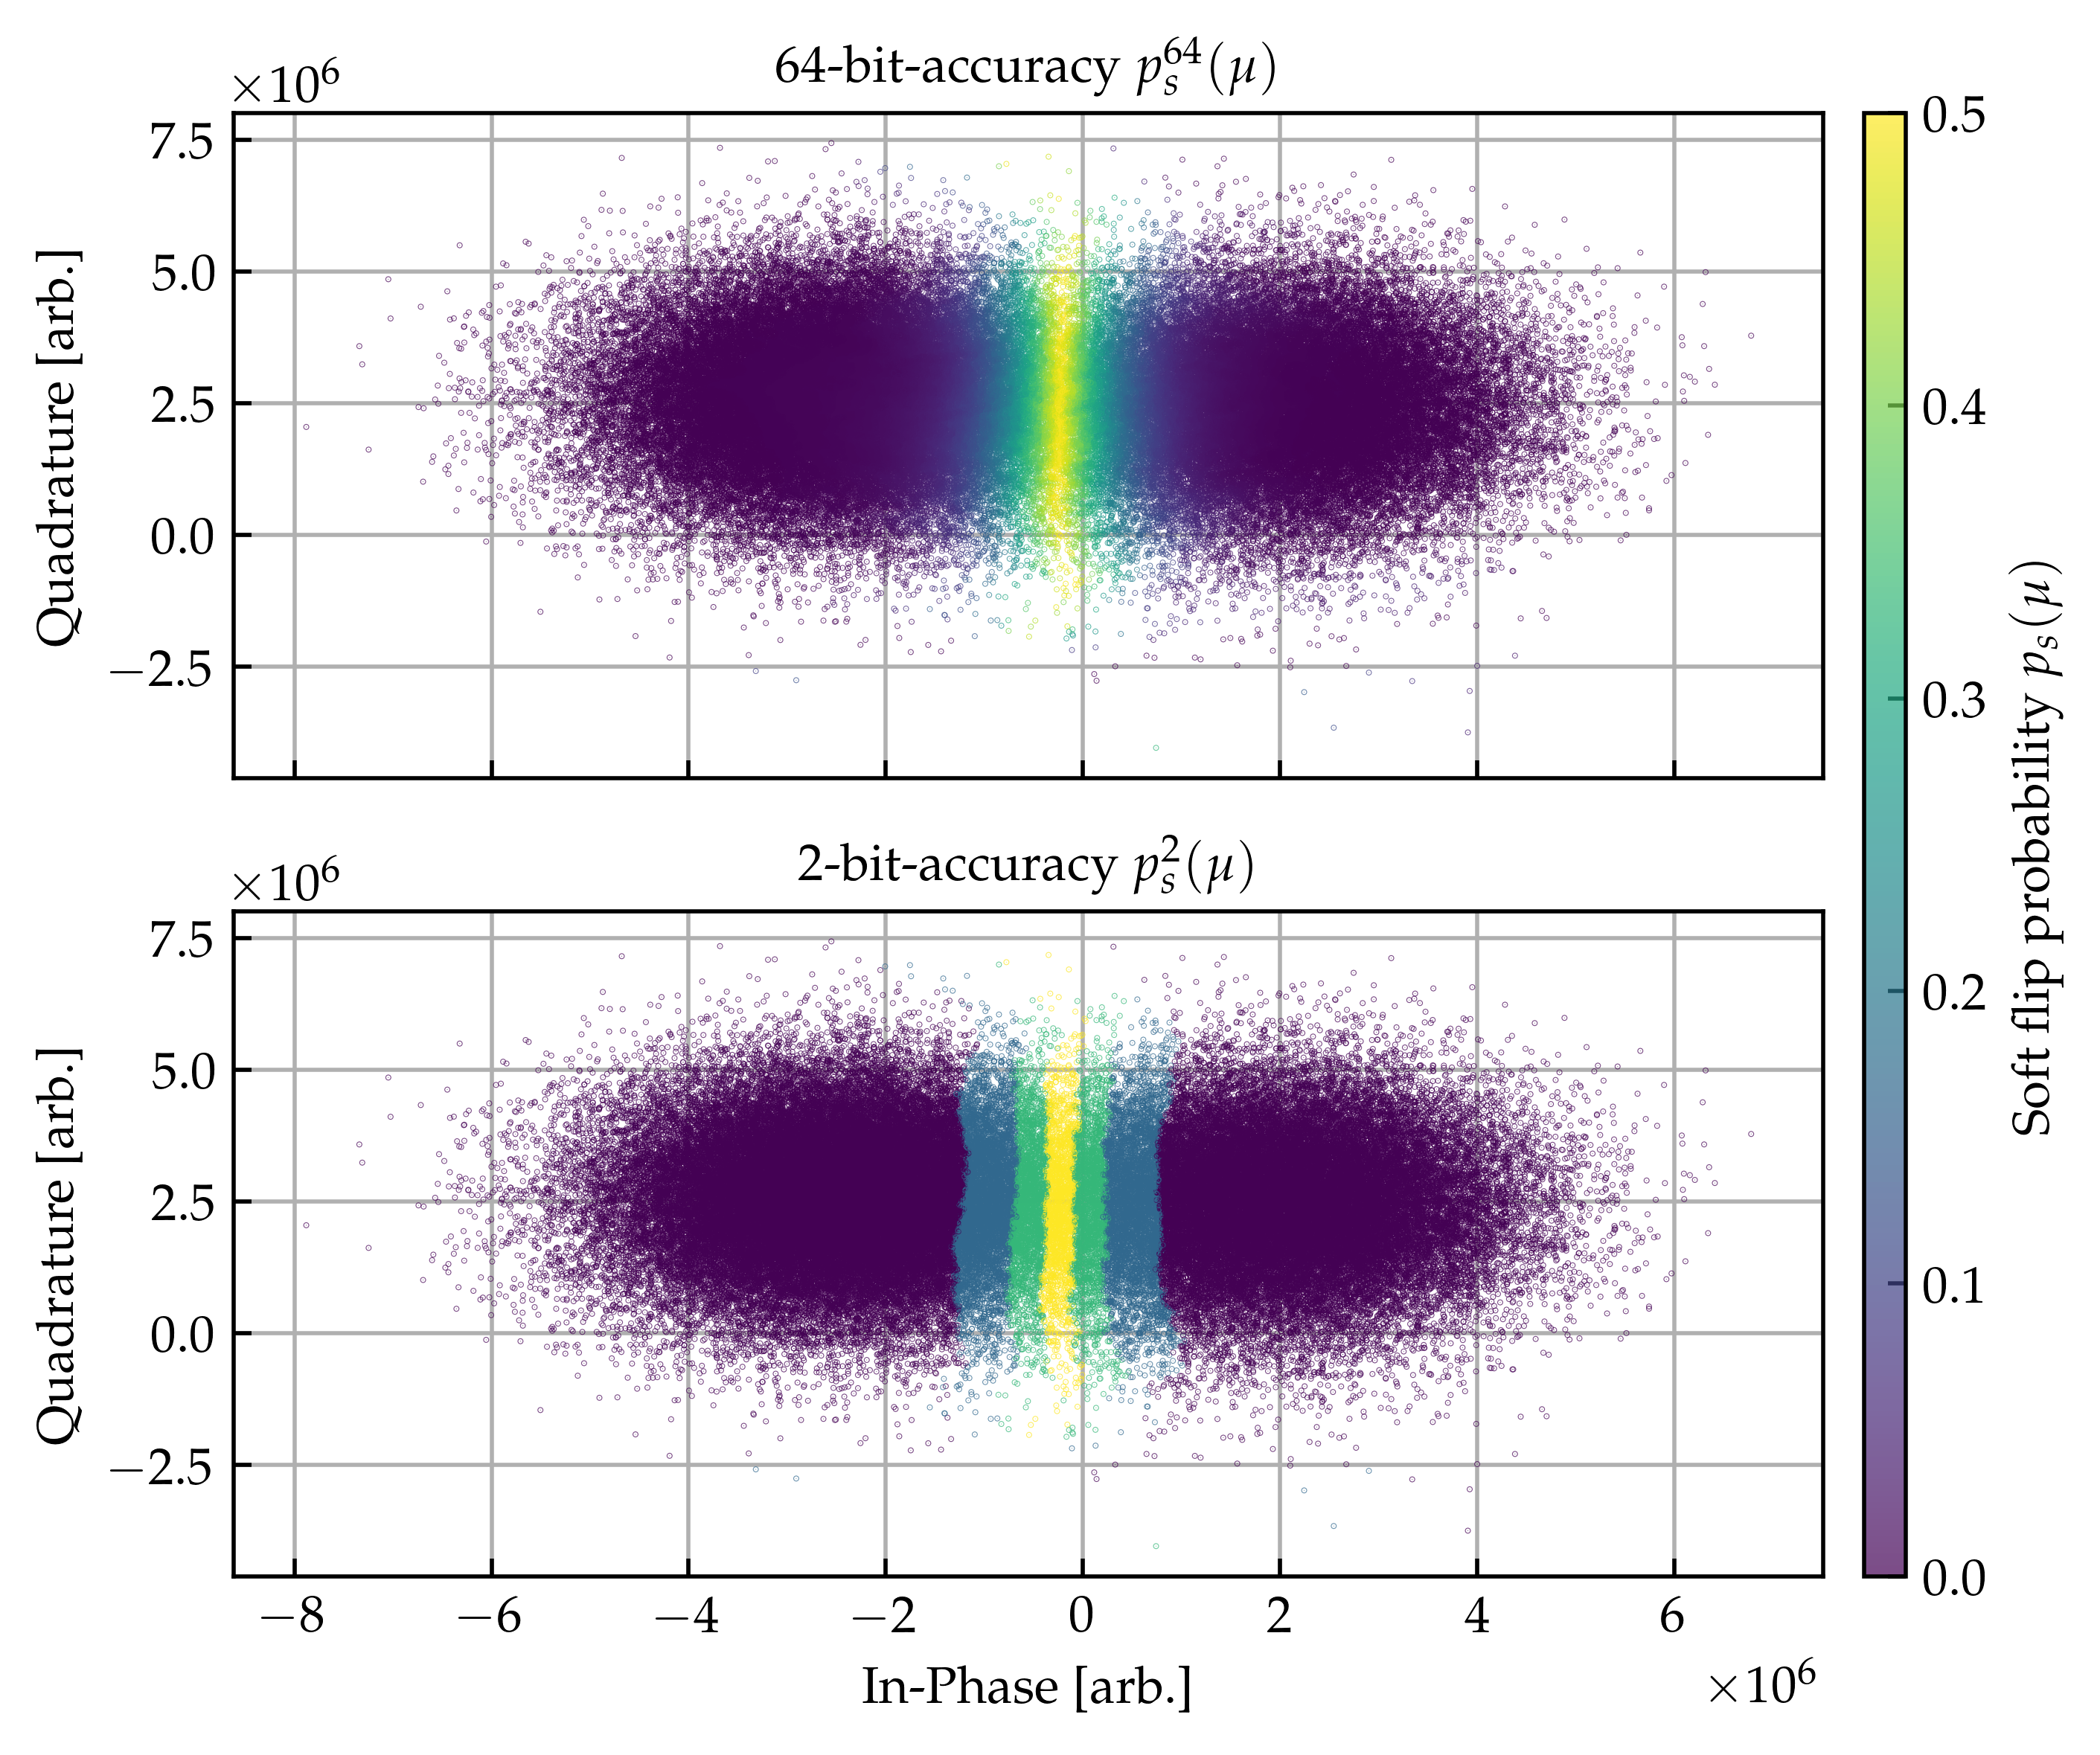

In [3]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import cpp_soft_info as csi
from soft_info import plot_IQ_data_pSoft_cmap, save_plot, apply_formatting, plot_double_IQ_scatter
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pickle

DEVICE = 'ibm_sherbrooke'
ROUNDS = 100
threshold = 0.01


qubit = 72

LOGICAL = '0'
XBASIS = False
file_name = f"../results/Leakage/Correct_{DEVICE}_{LOGICAL}_{XBASIS}_{ROUNDS}.pkl"
with open(file_name, 'rb') as f:
    (pSofts, countMats, estim0Mats, estim1Mats, inverted_q_maps, big_memories) = pickle.load(f)
n_shots = 1_000
pSoft = np.vstack(pSofts)[:n_shots]
big_memory = np.vstack(big_memories)[:n_shots]

nBits = 2
pSoft_trunc = csi.quantizeMatrixVectorized(pSoft, nBits)

inverted_q_map = inverted_q_maps[0]
cols = inverted_q_map[qubit]
# fig = plot_IQ_data_pSoft_cmap(big_memory[:, cols], pSoft_trunc[:, cols], alpha=0.7)
fig = plot_double_IQ_scatter(big_memory[:, cols], pSoft[:, cols], pSoft_trunc[:, cols], nBits=nBits, dpi=500)
save_plot(fig, f'4_RepetitionCodes/pSoftCmapTrunc_{qubit}_{nBits}_bits.pdf', format='pdf')

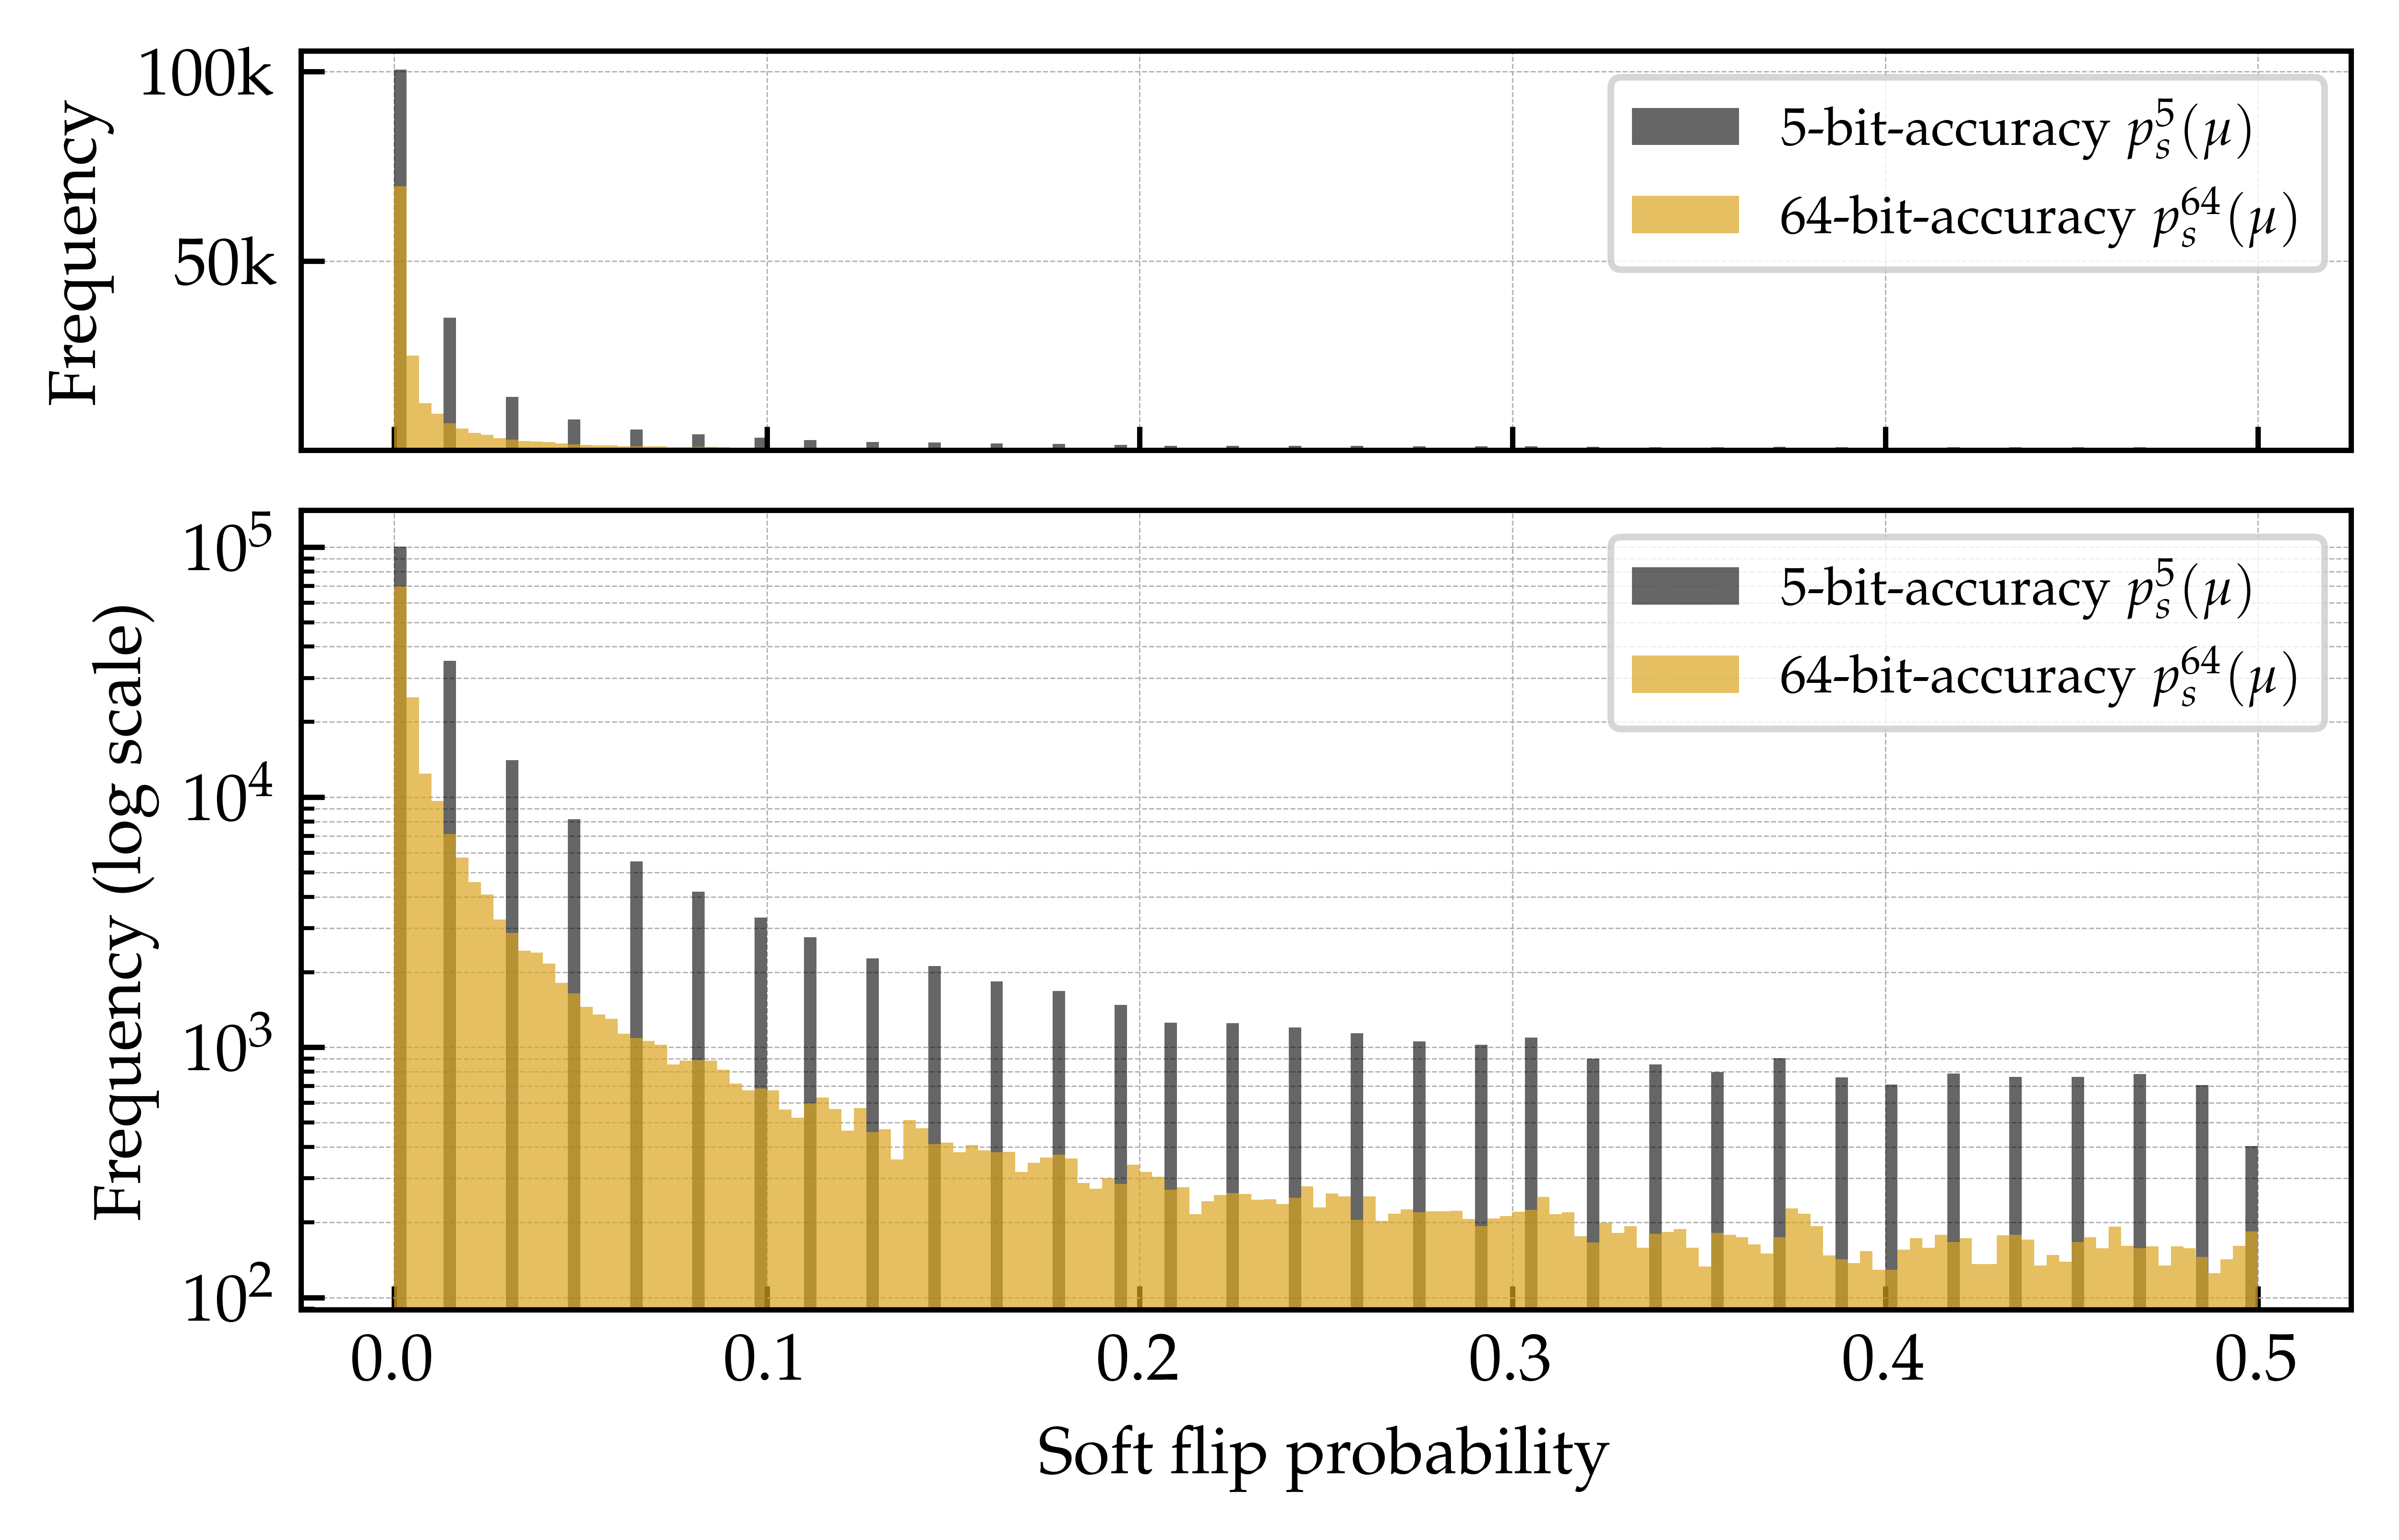

In [4]:
import numpy as np
import cpp_soft_info as csi
from soft_info import plot_IQ_data_pSoft_cmap
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

DEVICE = 'ibm_sherbrooke'
ROUNDS = 100
threshold = 0.01


qubit = 72

LOGICAL = '0'
XBASIS = False
file_name = f"../results/Leakage/Correct_{DEVICE}_{LOGICAL}_{XBASIS}_{ROUNDS}.pkl"
with open(file_name, 'rb') as f:
    (pSofts, countMats, estim0Mats, estim1Mats, inverted_q_maps, big_memories) = pickle.load(f)
n_shots = 2_000
pSoft = np.vstack(pSofts)[:n_shots]
big_memory = np.vstack(big_memories)[:n_shots]

nBits = 5
pSoft_trunc = csi.quantizeMatrixVectorized(pSoft, nBits)

inverted_q_map = inverted_q_maps[0]
cols = inverted_q_map[qubit]


apply_formatting()  # Custom formatting for the plot (assumed to be defined)
fig = plt.figure() 
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 2], hspace=0.1)  # 2:1 height ratio

# Plotting the first histogram with log scale
ax1 = fig.add_subplot(gs[1, 0])  # This is the first subplot with double height
ax1.hist(pSoft_trunc[:, cols].flatten(), bins=150, label=f"{nBits}-bit-accuracy $p^{nBits}_s(\mu)$", alpha=0.6, color='k')
ax1.hist(pSoft[:, cols].flatten(), bins=150, label="64-bit-accuracy $p^{64}_s(\mu)$", alpha=0.7, color='goldenrod')
ax1.set_yscale('log')
ax1.grid(True, which="both", linestyle='--', linewidth=0.2)
ax1.set_ylabel('Frequency (log scale)')
ax1.set_xlabel('Soft flip probability')
ax1.legend(fontsize=8)

# Plotting the second histogram without log scale
ax2 = fig.add_subplot(gs[0, 0], sharex=ax1)  # This is the second subplot
ax2.hist(pSoft_trunc[:, cols].flatten(), bins=150, label=f"{nBits}-bit-accuracy $p^{nBits}_s(\mu)$", alpha=0.6, color='k')
ax2.hist(pSoft[:, cols].flatten(), bins=150, label="64-bit-accuracy $p^{64}_s(\mu)$", alpha=0.7, color='goldenrod')
ax2.set_yticks([50_000, 100_000], ['50k', '100k'])
ax2.grid(True, which="both", linestyle='--', linewidth=0.2)
ax2.set_ylabel('Frequency')
ax2.legend(fontsize=8)

# Hide x labels and tick labels for top plot (ax1) to avoid overlap
ax2.label_outer()
plt.show()
save_plot(fig, f'4_RepetitionCodes/SoftHist_{qubit}_{nBits}_bits.pdf', format='pdf')

